# Simulation of Hi-C data

In [1]:
import sys
sys.path.insert(1, '/home/elinfi/MasterCode/src/class/')

In [2]:
import cooltools.lib.plotting

import numpy as np
import matplotlib as mpl
import pretty_plotting as pplot
import matplotlib.pyplot as plt
import change_functions as cf

from simulate_data import SimulateData
from mid_point_log_norm import MidPointLogNorm
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

In [3]:
import simulation_functions as f
print(f.df_chromsizes())

name
chr1     248956422
chr2     242193529
chr3     198295559
chr4     190214555
chr5     181538259
chr6     170805979
chr7     159345973
chr8     145138636
chr9     138394717
chr10    133797422
chr11    135086622
chr12    133275309
chr13    114364328
chr14    107043718
chr15    101991189
chr16     90338345
chr17     83257441
chr18     80373285
chr19     58617616
chr20     64444167
chr21     46709983
chr22     50818468
chrX     156040895
chrY      57227415
Name: length, dtype: int32


In [4]:
# globally set font sizes
pplot.font_size(12, 14, 16)

## Initialization
Specify the **resolution** and **maximum range** of simulated matrix.

In [5]:
resolution = 16000
max_range = 4e6
ntads = 5
print(max_range/248e6)

0.016129032258064516


In [6]:
simulation = SimulateData(resolution, max_range, ntads)
print(simulation.mat1.shape)
print(simulation.mat_region)

(6, 5)
(251, 251)
chr10:6351511-10351511


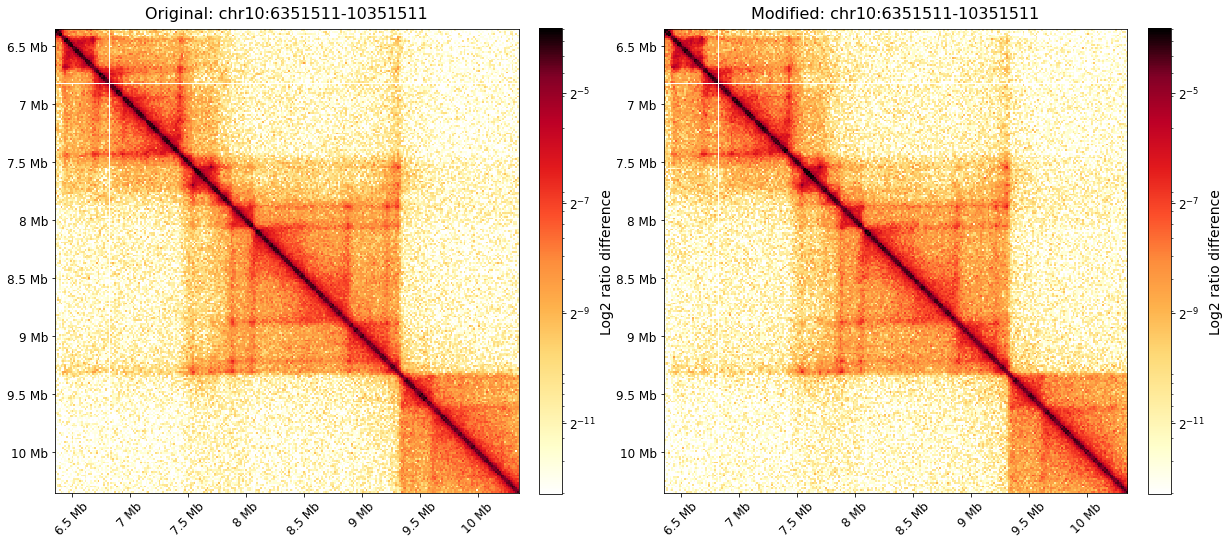

In [7]:
f, axs = plt.subplots(figsize=(20, 20),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

norm = mpl.colors.LogNorm()
extent=pplot.region2extent(simulation.mat_region)

ax = axs[0]
im = ax.matshow(simulation.mat1,
                cmap='fall',
                norm=norm,
                extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('Original: ' + simulation.mat_region, y=1.01)
#plt.savefig('../Figures/sub_002_001.png')
pplot.format_ticks(ax)

ax = axs[1]
im = ax.matshow(simulation.mat2,
                cmap='fall',
                norm=norm,
               extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('Modified: ' + simulation.mat_region, y=1.01)
pplot.format_ticks(ax)
plt.savefig('../img/Simulation/org_mod.png')

## Change TAD
Change interaction frequency of TAD according to own defined function.

In [8]:
simulation.change_tad(cf.constant, n=1, random_state=16, k=1)

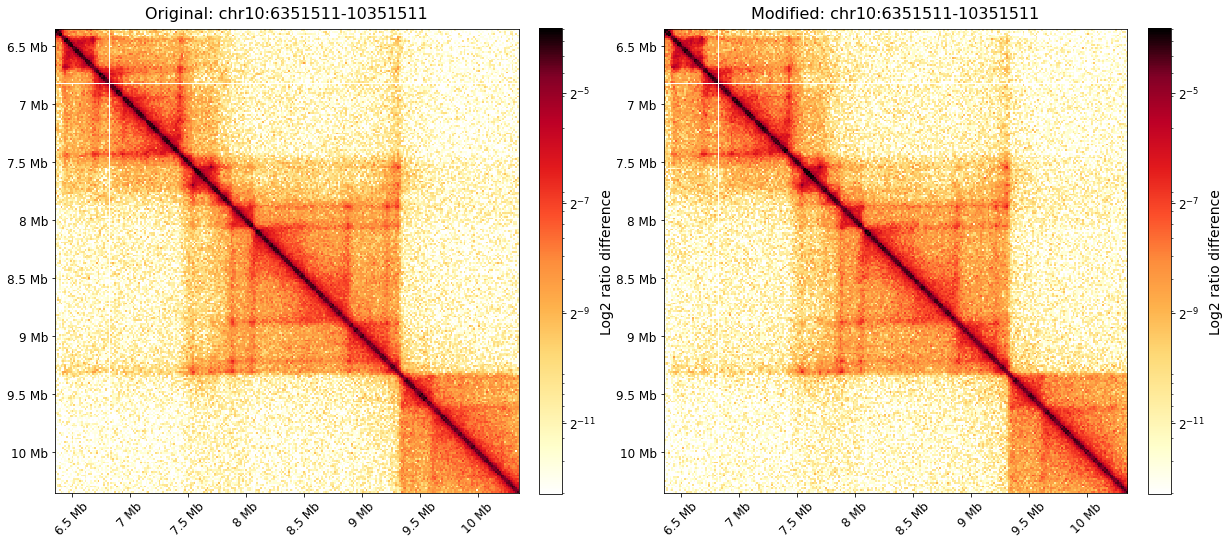

In [9]:
f, axs = plt.subplots(figsize=(20, 20),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

norm = mpl.colors.LogNorm()
extent=pplot.region2extent(simulation.mat_region)

ax = axs[0]
im = ax.matshow(simulation.mat1,
                cmap='fall',
                norm=norm,
                extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('Original: ' + simulation.mat_region, y=1.01)
#plt.savefig('../Figures/sub_002_001.png')
pplot.format_ticks(ax)

ax = axs[1]
im = ax.matshow(simulation.mat2,
                cmap='fall',
                norm=norm,
               extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('Modified: ' + simulation.mat_region, y=1.01)
pplot.format_ticks(ax)
plt.savefig('../img/Simulation/org_mod.png')

## Change TAD-TAD 

In [10]:
simulation.change_tad_tad(cf.constant, random_state=None, k=2)

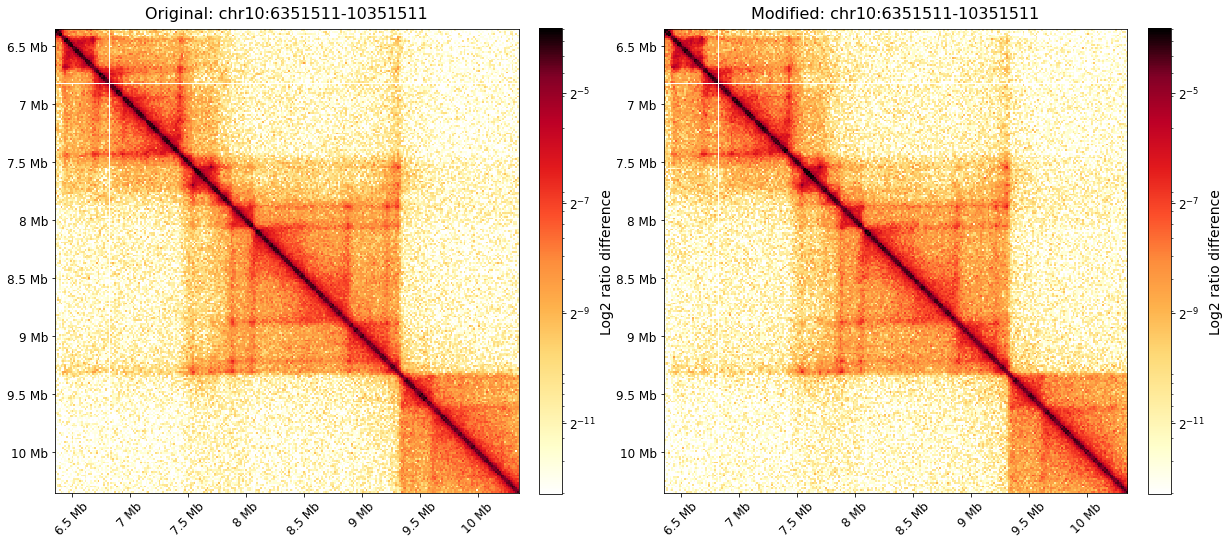

In [11]:
f, axs = plt.subplots(figsize=(20, 20),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

norm = mpl.colors.LogNorm()
extent=pplot.region2extent(simulation.mat_region)

ax = axs[0]
im = ax.matshow(simulation.mat1,
                cmap='fall',
                norm=norm,
                extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('Original: ' + simulation.mat_region, y=1.01)
pplot.format_ticks(ax)

ax = axs[1]
im = ax.matshow(simulation.mat2,
                cmap='fall',
                norm=norm,
               extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('Modified: ' + simulation.mat_region, y=1.01)
pplot.format_ticks(ax)
plt.savefig('../img/Simulation/org_mod.png')

## Change loops

In [13]:
simulation.change_loop(cf.constant, n=5, random_state=None, k=10)

(5, 6)
5


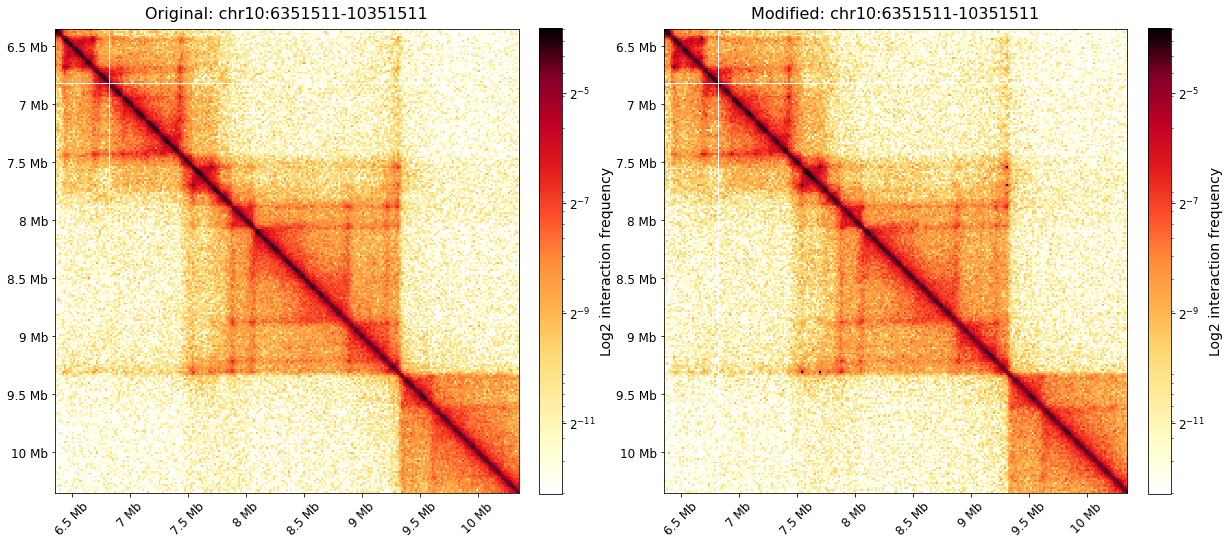

In [14]:
f, axs = plt.subplots(figsize=(20, 20),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

norm = mpl.colors.LogNorm()
extent=pplot.region2extent(simulation.mat_region)

ax = axs[0]
im = ax.matshow(simulation.mat1,
                cmap='fall',
                norm=norm,
                extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 interaction frequency', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('Original: ' + simulation.mat_region, y=1.01)
pplot.format_ticks(ax)

ax = axs[1]
im = ax.matshow(simulation.mat2,
                cmap='fall',
                norm=norm,
               extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 interaction frequency', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('Modified: ' + simulation.mat_region, y=1.01)
pplot.format_ticks(ax)
plt.savefig('../img/Simulation/org_mod.png')

## Compare simulation matrices

### Ratio

In [15]:
method = 'ratio'
diff_ratio = simulation.compare(method=method)

/home/elinfi/MasterCode/src/class/mid_point_log_norm.py:15: RuntimeWarning: invalid value encountered in log
  return np.ma.array(np.interp(np.log(result), x, y), mask=result.mask, copy=False)


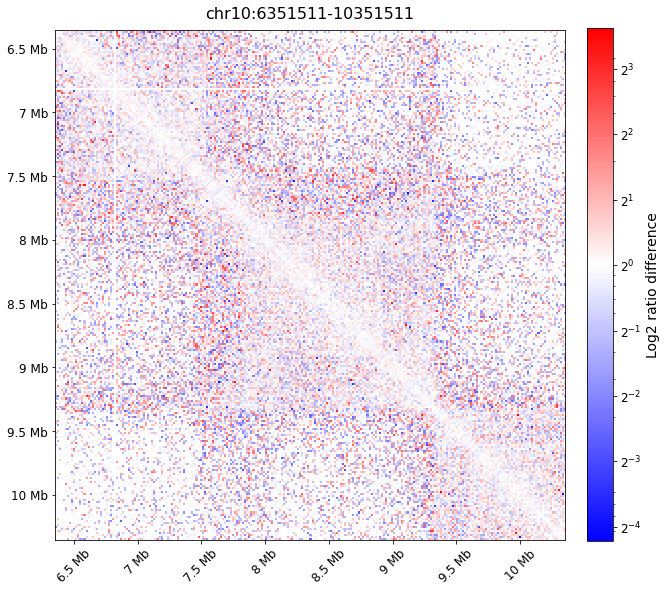

In [16]:
f, axs = plt.subplots(figsize=(10, 10),
                      nrows=1,
                      ncols=1,
                      sharex=True, sharey=False)

norm = MidPointLogNorm(midpoint=1)
extent=pplot.region2extent(simulation.mat_region)

ax = axs
im = ax.matshow(diff_ratio,
                cmap='bwr',
                norm=norm,
               extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title(simulation.mat_region, y=1.01)
pplot.format_ticks(ax)
plt.savefig('../img/Simulation/sim_ratio.png')

### Relative difference

In [17]:
method = 'reldiff'
diff_rel = simulation.compare(method=method)

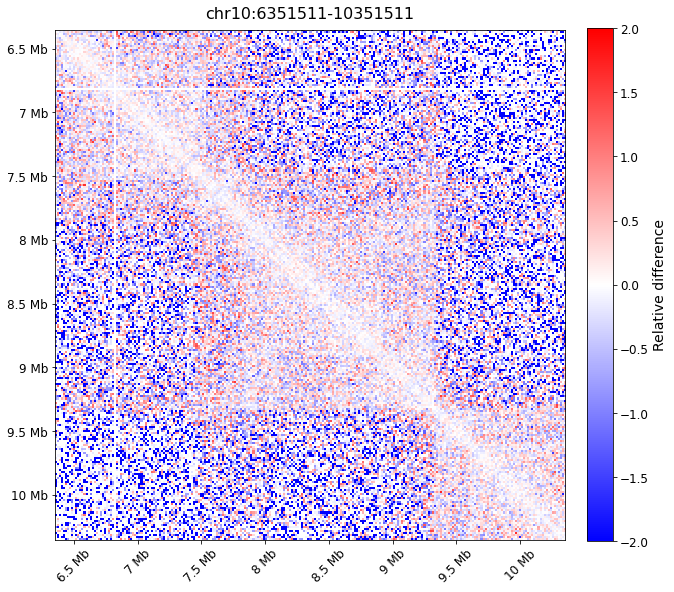

In [18]:
f, axs = plt.subplots(figsize=(10, 10),
                      nrows=1,
                      ncols=1,
                      sharex=True, sharey=False)
ax = axs
vmax = np.nanmax(abs(diff_rel))
extent=pplot.region2extent(simulation.mat_region)

im = ax.matshow(diff_rel,
                vmax=vmax,
                vmin=-vmax,
                cmap='bwr',
                extent=extent)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Relative difference', ax=ax)
ax.set_title(simulation.mat_region, y=1.01)
pplot.format_ticks(ax)
plt.savefig('../img/Simulation/sim_reldiff.png')

In [19]:
filename = '../data/Simulations/reldiff.npy'
simulation.write2file(filename, diff_rel)